<a name="contrastive"></a>
# Case 3
## [Description]

<span style="font-size:18px;color:blue">
In this case, you are playing a role of cybersecurity analysts in the incident response team. <b>You are particularly  interested in the contrastive explanations:</b>
    <ul>
<li>You may want to underdatand why a network flow is identified as abnormal and if so what changes in the network flow features would make them normal. </li>
<li>The contrastive explanations can help you understand the decisions made by IDS (Intrusion Detection System) that netowrk flow being identified as normal or abnormal.</li>
    </ul>


</span>

# [Your Task]

<span style="font-size:18px;color:blue">

**Make sure you have been assigned a subject ID before you start.**

Your task include:
- Read the case description for each case labeled <b>"[Description]"</b> to understand your task in the case
- The cells with the label <b>"[Processing]"</b> show what the IDS algorithms are doing. **You are not asked to rate them.**
- Go through the explainations (highlighed under the title <b>"[Explaination to Rate]"</b>)
- Rate the helpfulness, correctness and the ease of understanding <b>using this <a href="https://utampa.az1.qualtrics.com/jfe/form/SV_1TAX5AYDOfrAJHD">link</a>.</b> 
    - Each explanation can be tracked by its id (for example, EC21)
</span>

### [Processing] Load  dataset and show sample applicants

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

from aix360.algorithms.contrastive import CEMExplainer, KerasClassifier
from aix360.algorithms.protodash import ProtodashExplainer
from aix360.datasets.ugr_dataset import UGRDataset



heloc = UGRDataset()
df = heloc.dataframe()

#df.rename( columns={'Unnamed: 0':'ID'}, inplace=True )
#df.pop('ID')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 24)
pd.set_option('display.width', 1000)
print("Size of UGR dataset:", df.shape)
print("Number of \"Normal\" connections:", np.sum(df['Label']=='normal'))
print("Number of \"Abnormal\" connections:", np.sum(df['Label']=='abnormal'))
print("Sample Connections:")
df.head(10).transpose()

Using TensorFlow backend.


!!!!!!!!!!!test1
Using UGR dataset2:  /home/ec2-user/aix360/UGR-processing/AIX-UGR/aix360/datasets/../data/heloc_data/ugr_dataset.csv
Size of UGR dataset: (1083605, 10)
Number of "Normal" connections: 0
Number of "Abnormal" connections: 0
Sample Connections:


,0,1,2,3,4,5,6,7,8,9
Timestamp,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FlowDuration,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SrcIP,4.164107e+09,7.190350e+08,7.190364e+08,3.554046e+09,2.215383e+09,3.104125e+09,7.190356e+08,7.190350e+08,7.190347e+08,3.526242e+09
DstIP,7.190333e+08,1.244120e+09,1.423065e+09,7.190356e+08,7.190326e+08,7.190362e+08,1.053671e+09,2.403863e+09,1.244008e+09,7.190347e+08
SrcPort,4.973800e+04,8.000000e+01,3.490000e+03,5.016300e+04,3.914300e+04,4.430000e+02,4.430000e+02,4.698900e+04,5.300000e+01,3.542300e+04
DstPort,2.200000e+01,5.413100e+04,2.210000e+03,4.430000e+02,1.900000e+03,5.377900e+04,3.312400e+04,5.300000e+01,5.721400e+04,5.300000e+01
Protocol,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
TypeofService,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
PacketExed,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Label,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Distribution of several features:


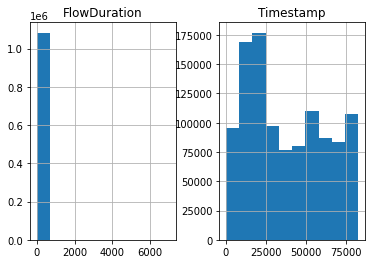

In [2]:
# Plot (example) distributions for two features
print("Distribution of several features:")
hist = df.hist(column=['FlowDuration', 'Timestamp'], bins=10)

###  [Processing]  Step 1. Process and Normalize  dataset for training


In [3]:
# Clean data and split dataset into train/test
PROCESS_DATA = True

if (PROCESS_DATA): 
    (Data, x_train, x_test, y_train_b, y_test_b) = heloc.split()
    np.savez('heloc.npz', Data=Data, x_train=x_train, x_test=x_test, y_train_b=y_train_b, y_test_b=y_test_b)
else:
    heloc = np.load('heloc.npz', allow_pickle = True)
    Data = heloc['Data']
    x_train = heloc['x_train']
    x_test  = heloc['x_test']
    y_train_b = heloc['y_train_b']
    y_test_b  = heloc['y_test_b']

[[0.00000000e+00 0.00000000e+00 4.16410692e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.19034999e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.19036359e+08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.68000000e+04 0.00000000e+00 3.65089480e+09 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.12000000e+04 0.00000000e+00 3.65089480e+09 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.12000000e+04 0.00000000e+00 3.65089480e+09 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [4]:
Z = np.vstack((x_train, x_test))
Zmax = np.max(Z, axis=0)
Zmin = np.min(Z, axis=0)

#normalize an array of samples to range [-0.5, 0.5]
def normalize(V):
    VN = (V - Zmin)/(Zmax - Zmin)
    VN = VN - 0.5
    return(VN)
    
# rescale a sample to recover original values for normalized values. 
def rescale(X):
    return(np.multiply ( X + 0.5, (Zmax - Zmin) ) + Zmin)

N = normalize(Z)
xn_train = N[0:x_train.shape[0], :]
xn_test  = N[x_train.shape[0]:, :]

<a name="c2"></a>
###  [Processing] Step 2. Define and train a NN classifier


In [5]:
# nn with no softmax
def nn_small():
    model = Sequential()
    model.add(Dense(10, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))    
    return model   

In [7]:
# Set random seeds for repeatability
np.random.seed(1) 
tf.set_random_seed(2) 

class_names = ['normal', 'abnormal']

# loss function
def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct, logits=predicted)

# compile and print model summary
nn = nn_small()
nn.compile(loss=fn, optimizer='adam', metrics=['accuracy'])
nn.summary()


# train model or load a trained model
TRAIN_MODEL = False

if (TRAIN_MODEL):             
    nn.fit(xn_train, y_train_b, batch_size=128, epochs=50, verbose=1, shuffle=False)
    nn.save_weights("heloc_nnsmall.h5")     
else:    
    nn.load_weights("heloc_nnsmall.h5")
        

# evaluate model accuracy        
score = nn.evaluate(xn_train, y_train_b, verbose=0) #Compute training set accuracy
#print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = nn.evaluate(xn_test, y_test_b, verbose=0) #Compute test set accuracy
#print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________
Train accuracy: 0.8696350327242783
Test accuracy: 0.8704476157412022


In [8]:
# Some interesting user samples to try: 2344 449 1168 1272
idx = 272

X = xn_test[idx].reshape((1,) + xn_test[idx].shape)
print("Computing PN for Sample:", idx)
print("Prediction made by the model:", nn.predict_proba(X))
print("Prediction probabilities:", class_names[np.argmax(nn.predict_proba(X))])
print("")

mymodel = KerasClassifier(nn)
explainer = CEMExplainer(mymodel)

arg_mode = 'PN' # Find pertinent negatives
arg_max_iter = 1000 # Maximum number of iterations to search for the optimal PN for given parameter settings
arg_init_const = 10.0 # Initial coefficient value for main loss term that encourages class change
arg_b = 9 # No. of updates to the coefficient of the main loss term
arg_kappa = 0.1 # Minimum confidence gap between the PNs (changed) class probability and original class' probability
arg_beta = 1e-1 # Controls sparsity of the solution (L1 loss)
arg_gamma = 100 # Controls how much to adhere to a (optionally trained) auto-encoder
my_AE_model = None # Pointer to an auto-encoder

# Find PN for applicant 1272
(adv_pn, delta_pn, info_pn) = explainer.explain_instance(X, arg_mode, my_AE_model, arg_kappa, arg_b,
                                                         arg_max_iter, arg_init_const, arg_beta, arg_gamma)

Computing PN for Sample: 272
Prediction made by the model: [[ 1.3213744 -1.3666   ]]
Prediction probabilities: normal


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
iter:0 const:[10.]
Loss_Overall:31.0425, Loss_Attack:26.5143
Loss_L2Dist:4.0822, Loss_L1Dist:4.4600, AE_loss:0.0
target_lab_score:1.0097, max_nontarget_lab_score:-1.5417

iter:500 const:[10.]
Loss_Overall:2.7466, Loss_Attack:0.0000
Loss_L2Dist:2.4731, Loss_L1Dist:2.7357, AE_loss:0.0
target_lab_score:-4.9110, max_nontarget_lab_score:5.2793

iter:0 const:[5.]
Loss_Overall:35.7470, Loss_Attack:33.0536
Loss_L2Dist:2.3686, Loss_L1Dist:3.2485, AE_loss:0.0
target_lab_score:2.8965, max_nontarget_lab_score:-3.6142

iter:500 const:[5.]
Loss_Overall:2.2424, Loss_Attack:0.0000
Loss_L2Dist:1.9566, Loss_L1Dist:2.8582, AE_loss:0.0
target_lab_score:-2.3491, max_nontarget_lab_score:1.9622

iter:0 const:[2.5]
Loss_O

<a name="c3"></a>
###  [Description] Step 3. Compute contrastive explanations for a few applicants

<span style="font-size:18px;color:blue">

The IDS predications were generated using a neural network classifier. 
    
The above results shows the train accuracy is 0.87 and the test accurary is 0.87. 
    
At this point, <b> you want to examine a network flow identified as abnormal and see what (minimal) changes to its features would lead to normal (i.e., finding pertinent negatives). </b>
- This will help you understand how a network flow was initially identified as abnormal could be determined normal after a few changes in its features. 
    
The following result showcases how the decision could have been different through minimal changes to the network flow.
- You can find the importance of different features to produce the change in the decision. 
- The column delta in the table below indicates the necessary deviations for each of the features to produce this decision change. 

</span>



In [9]:
Xpn = adv_pn
classes = [ class_names[np.argmax(nn.predict_proba(X))], class_names[np.argmax(nn.predict_proba(Xpn))], 'NIL' ]

print("Sample:", idx)
print("prediction(X)", nn.predict_proba(X), class_names[np.argmax(nn.predict_proba(X))])
print("prediction(Xpn)", nn.predict_proba(Xpn), class_names[np.argmax(nn.predict_proba(Xpn))] )


X_re = rescale(X) # Convert values back to original scale from normalized
Xpn_re = rescale(Xpn)
Xpn_re = np.around(Xpn_re.astype(np.double), 2)

delta_re = Xpn_re - X_re
delta_re = np.around(delta_re.astype(np.double), 2)
delta_re[np.absolute(delta_re) < 1e-4] = 0

X3 = np.vstack((X_re, Xpn_re, delta_re))

dfre = pd.DataFrame.from_records(X3) # Create dataframe to display original point, PN and difference (delta)
dfre[23] = classes

dfre.columns = df.columns
dfre.rename(index={0:'X',1:'X_PN', 2:'(X_PN - X)'}, inplace=True)
dfret = dfre.transpose()


def highlight_ce(s, col, ncols):
    if (type(s[col]) != str):
        if (s[col] > 0):
            return(['background-color: yellow']*ncols)    
    return(['background-color: white']*ncols)

dfret.style.apply(highlight_ce, col='(X_PN - X)', ncols=3, axis=1) 

Sample: 272
prediction(X) [[ 1.3213744 -1.3666   ]] normal
prediction(Xpn) [[-0.09224558  0.0197897 ]] abnormal


,X,X_PN,(X_PN - X)
Timestamp,57600.000000,57600.000000,0.000000
FlowDuration,0.000000,0.000000,0.000000
SrcIP,719036250.000000,719036301.780000,51.780000
DstIP,2004062569.000000,2004062501.800000,-67.200000
SrcPort,24020.000000,24020.000000,0.000000
DstPort,445.000000,5226.390000,4781.390000
Protocol,1.000000,1.310000,0.310000
TypeofService,0.000000,0.000000,0.000000
PacketExed,0.000000,0.000000,0.000000
Label,normal,abnormal,NIL


<span style="font-size:18px;color:blue">



## [Explanation to Rate] ID: EC31

You have observed that the network flow would have been identified as normal if the values of some features have some changes. 
- The changes to the suggested factors are also intuitively consistent in improving the chances of being identified as a normal network flow. 


<b>The following human friendly explanation visualize the feature importance based on the above devitations. </b>
    
    
Rate the following explanations as a whole in the survey. The id is **EC31**

    
</span>


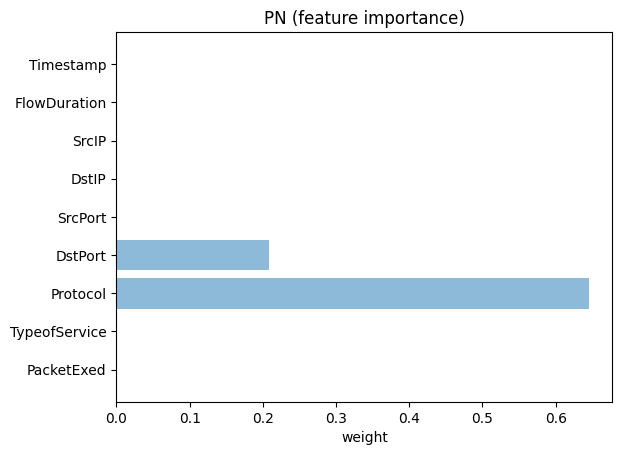

In [10]:
plt.rcdefaults()
fi = abs((X-Xpn).astype('double'))/np.std(xn_train.astype('double'), axis=0) # Compute PN feature importance
objects = df.columns[-2::-1]
y_pos = np.arange(len(objects))
performance = fi[0, -1::-1]

plt.barh(y_pos, performance, align='center', alpha=0.5) # bar chart
plt.yticks(y_pos, objects) # Display features on y-axis
plt.xlabel('weight') # x-label
plt.title('PN (feature importance)') # Heading

plt.show() # Display PN feature importance

####  [Processing] Compute Pertinent Positives (PP)

In [11]:
# Some interesting user samples to try: 8 9 11
idx = 8

X = xn_test[idx].reshape((1,) + xn_test[idx].shape)
print("Computing PP for Sample:", idx)
print("Prediction made by the model:", class_names[np.argmax(nn.predict_proba(X))])
print("Prediction probabilities:", nn.predict_proba(X))
print("")


mymodel = KerasClassifier(nn)
explainer = CEMExplainer(mymodel)

arg_mode = 'PP' # Find pertinent positives
arg_max_iter = 1000 # Maximum number of iterations to search for the optimal PN for given parameter settings
arg_init_const = 10.0 # Initial coefficient value for main loss term that encourages class change
arg_b = 9 # No. of updates to the coefficient of the main loss term
arg_kappa = 0.1 # Minimum confidence gap between the PNs (changed) class probability and original class' probability
arg_beta = 1e-1 # Controls sparsity of the solution (L1 loss)
arg_gamma = 100 # Controls how much to adhere to a (optionally trained) auto-encoder
my_AE_model = None # Pointer to an auto-encoder

(adv_pp, delta_pp, info_pp) = explainer.explain_instance(X, arg_mode, my_AE_model, arg_kappa, arg_b,
                                                         arg_max_iter, arg_init_const, arg_beta, arg_gamma)

Computing PP for Sample: 8
Prediction made by the model: normal
Prediction probabilities: [[ 2.317553  -2.1121364]]

iter:0 const:[10.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:1.6853, max_nontarget_lab_score:-1.7981

iter:500 const:[10.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:1.6853, max_nontarget_lab_score:-1.7981

iter:0 const:[5.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:1.6853, max_nontarget_lab_score:-1.7981

iter:500 const:[5.]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:1.6853, max_nontarget_lab_score:-1.7981

iter:0 const:[2.5]
Loss_Overall:0.0000, Loss_Attack:0.0000
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:1.6853, max_nontarget_lab_score:-1.7981

iter:500 const:[2.5]
Loss_Overall:0.

## [Explanation to Rate] ID: EC32

<span style="font-size:18px;color:blue">
    
    

Now, you are looking into another network flow which was identified as normal network flow by the IDS (Intrusion Detection System). <b>You want to ascertain here what minimal values for this profile would still have lead to being identified normal (i.e., finding pertinent positive). </b>
- This will help you understand how a network flow was initially identified as normal could still be determined normal after a few changes in its features. 
    

Below, you are provided with the pertinent positives as well as the important features in maintaining the status of being identified normal. 
- In the table below, the 0s in the X_PP column indicate that those features were not importnat. 
    
- Following the table, a feature importance plot is provided to you as a human friendly explanation. 
    
       

<b>In both of the table and plot, you can observe one network flow that would still have been idenfied as normal even if the value of some features was changed. </b>


Rate the following explanation in the survey. The id is **EC32**
    
</span>

In [12]:
Xpp = delta_pp
classes = [ class_names[np.argmax(nn.predict_proba(X))], class_names[np.argmax(nn.predict_proba(Xpp))]]

print("PP for Sample:", idx)
print("Prediction(Xpp) :", class_names[np.argmax(nn.predict_proba(Xpp))])
print("Prediction probabilities for Xpp:", nn.predict_proba(Xpp))
print("")

X_re = rescale(X) # Convert values back to original scale from normalized
adv_pp_re = rescale(adv_pp)
Xpp_re = X_re - adv_pp_re
Xpp_re = np.around(Xpp_re.astype(np.double), 2)
Xpp_re[Xpp_re < 1e-4] = 0

X2 = np.vstack((X_re, Xpp_re))

dfpp = pd.DataFrame.from_records(X2.astype('double')) # Showcase a dataframe for the original point and PP
dfpp[23] = classes
dfpp.columns = df.columns
dfpp.rename(index={0:'X',1:'X_PP'}, inplace=True)
dfppt = dfpp.transpose()

dfppt.style.apply(highlight_ce, col='X_PP', ncols=2, axis=1) 

PP for Sample: 8
Prediction(Xpp) : normal
Prediction probabilities for Xpp: [[ 1.685317  -1.7981305]]



,X,X_PP
Timestamp,72000.000000,0.000000
FlowDuration,0.000000,0.000000
SrcIP,2232564916.000000,18.070000
DstIP,719036242.000000,0.000000
SrcPort,57067.000000,0.000000
DstPort,10021.000000,0.000000
Protocol,1.000000,0.000000
TypeofService,0.000000,0.000000
PacketExed,0.000000,0.000000
Label,normal,normal


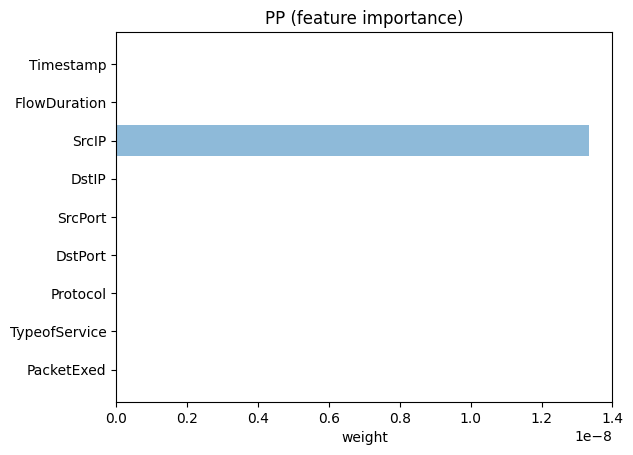

In [13]:
plt.rcdefaults()
fi = abs(Xpp_re.astype('double'))/np.std(x_train.astype('double'), axis=0) # Compute PP feature importance
    
objects = df.columns[-2::-1]
y_pos = np.arange(len(objects)) # Get input feature names
performance = fi[0, -1::-1]

plt.barh(y_pos, performance, align='center', alpha=0.5) # Bar chart
plt.yticks(y_pos, objects) # Plot feature names on y-axis
plt.xlabel('weight') #x-label
plt.title('PP (feature importance)') # Figure heading

plt.show()    # Display the feature importance

## Thank you for completing the task. Please submit the evaluation survey. 